# **Telecom**

El conjunto de datos incluye información sobre:

*Clientes que se fueron en el último mes: la columna se llama Renuncia

*Servicios a los que se ha suscrito cada cliente: teléfono, varias líneas,   Internet.

*Información de la cuenta del cliente: cuánto tiempo ha sido cliente, contrato, método de pago, facturación electrónica, cargos mensuales y cargos totales.

*Información demográfica sobre los clientes: género, si tiene pareja e hijos

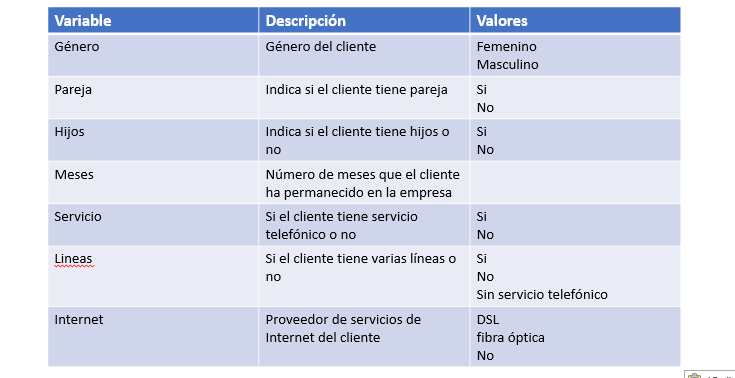

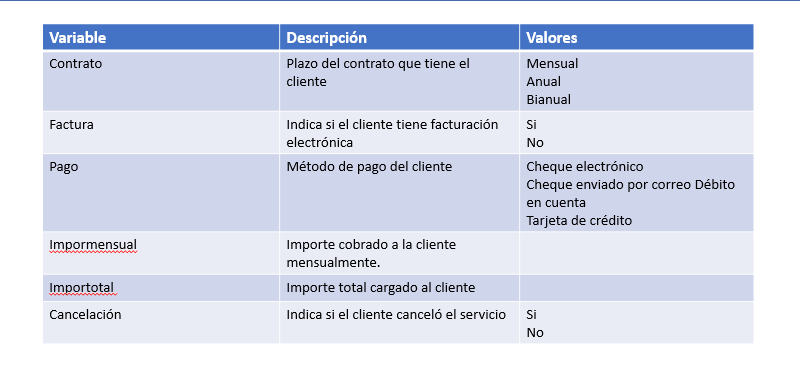

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos = pd.read_excel('/content/drive/MyDrive/Telecom.xlsx')
datos.head ()


,customerID,genero,Pareja,Hijos,Meses,Servicio,Lineas,Internet,Contrato,Factura,Pago,Impormensual,Importotal,Cancelacion
0,7590-VHVEG,Femenino,Si,No,1,No,Sin servicio telefónico,DSL,Mensual,Si,Cheque electrónico,29.85,29.85,No
1,5575-GNVDE,Masculino,No,No,34,Si,No,DSL,Anual,No,Cheque por correo,56.95,1889.5,No
2,3668-QPYBK,Masculino,No,No,2,Si,No,DSL,Mensual,Si,Cheque por correo,53.85,108.15,Si
3,7795-CFOCW,Masculino,No,No,45,No,Sin servicio telefónico,DSL,Anual,No,Débito en cuenta,42.30,1840.75,No
4,9237-HQITU,Femenino,No,No,2,Si,No,Fibra optica,Mensual,Si,Cheque electrónico,70.70,151.65,Si


In [ ]:
datos.info ()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customerID    7043 non-null   object 
 1   genero        7043 non-null   object 
 2   Pareja        7043 non-null   object 
 3   Hijos         7043 non-null   object 
 4   Meses         7043 non-null   int64  
 5   Servicio      7043 non-null   object 
 6   Lineas        7043 non-null   object 
 7   Internet      7043 non-null   object 
 8   Contrato      7043 non-null   object 
 9   Factura       7043 non-null   object 
 10  Pago          7043 non-null   object 
 11  Impormensual  7043 non-null   float64
 12  Importotal    7041 non-null   object 
 13  Cancelacion   7043 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 770.5+ KB


Importe total debe convertirse a numérica.

In [ ]:
datos.Importotal = pd.to_numeric(datos.Importotal, errors = 'coerce')

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customerID    7043 non-null   object 
 1   genero        7043 non-null   object 
 2   Pareja        7043 non-null   object 
 3   Hijos         7043 non-null   object 
 4   Meses         7043 non-null   int64  
 5   Servicio      7043 non-null   object 
 6   Lineas        7043 non-null   object 
 7   Internet      7043 non-null   object 
 8   Contrato      7043 non-null   object 
 9   Factura       7043 non-null   object 
 10  Pago          7043 non-null   object 
 11  Impormensual  7043 non-null   float64
 12  Importotal    7032 non-null   float64
 13  Cancelacion   7043 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 770.5+ KB


In [ ]:
datos.Importotal.isnull().sum()

11

La conversión generó 11 valores perdidos. Los llenaremos con el resultado de multiplicar las columnas de Meses e Importe mensual ya que el primero representa la cantidad de meses que el cliente estuvo en la empresa, y el segundo indica el monto pagado por mes.


In [ ]:
datos.Importotal.fillna(value = datos.Meses *  datos.Impormensual, inplace = True)

In [ ]:
datos.Importotal.isnull().sum()

0

**Análisis de variables numéricas**

In [ ]:
datos.describe().round()

,Meses,Impormensual,Importotal
count,7043.0,7043.0,7043.0
mean,32.0,65.0,2280.0
std,25.0,30.0,2267.0
min,0.0,18.0,0.0
25%,9.0,36.0,399.0
50%,29.0,70.0,1395.0
75%,55.0,90.0,3787.0
max,72.0,119.0,8685.0


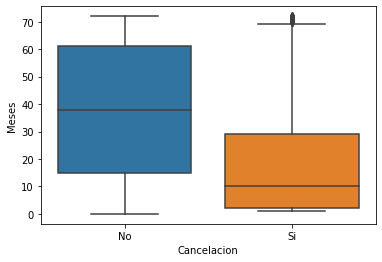

In [ ]:
sns.boxplot( x= 'Cancelacion', y='Meses', data=datos)

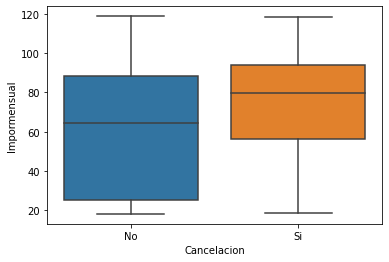

In [ ]:
sns.boxplot(  x= 'Cancelacion', y='Impormensual', data=datos)

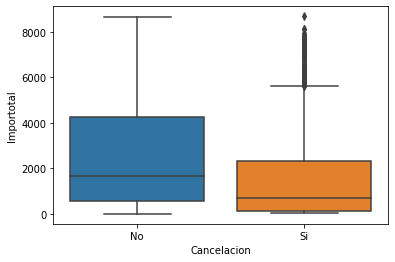

In [ ]:
sns.boxplot(  x= 'Cancelacion',y='Importotal', data=datos)

<Figure size 1080x720 with 0 Axes>

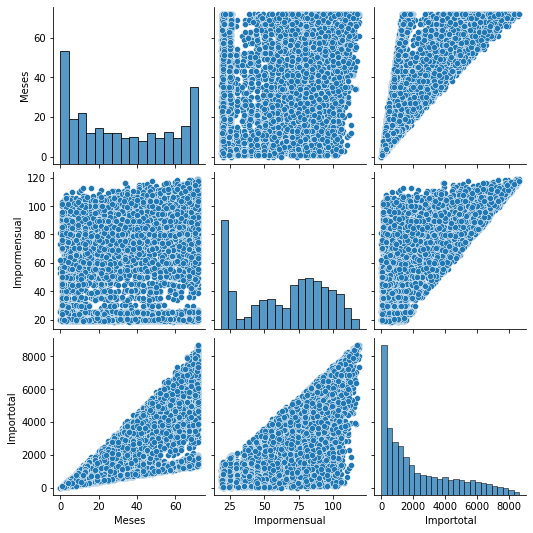

In [ ]:
numerics = datos[['Meses','Impormensual', 'Importotal']]
plt.figure(figsize = (15,10))
sns.pairplot(numerics)

In [ ]:
# Correlación entre columnas numéricas

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
2,Meses,Importotal,0.826178,0.826178
6,Importotal,Meses,0.826178,0.826178
5,Impormensual,Importotal,0.651174,0.651174
7,Importotal,Impormensual,0.651174,0.651174
1,Meses,Impormensual,0.247900,0.247900
3,Impormensual,Meses,0.247900,0.247900


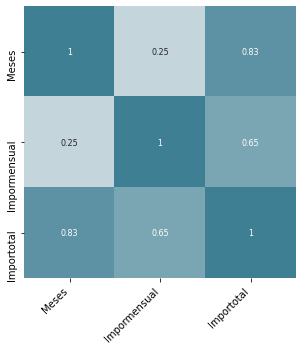

In [ ]:
# Matriz de correlaciones

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

**Análisis de variables cualitativas**

Género

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


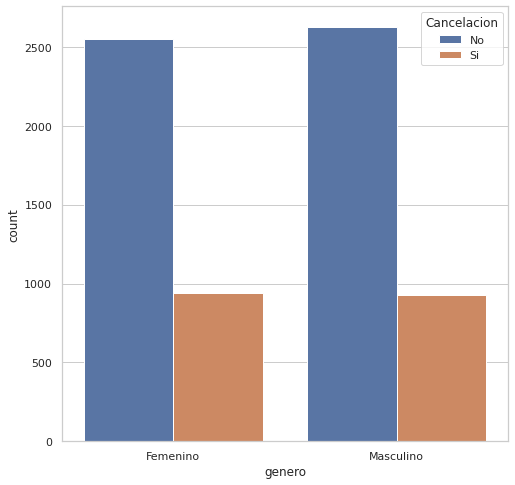

In [ ]:
plt.figure(figsize = (8,8))
sns.set(style = 'whitegrid')
sns.countplot(datos.genero, hue = datos.Cancelacion)

In [ ]:
medidas_genero = datos.groupby(by = 'genero')['Meses', 'Importotal', 'Impormensual'].mean().round()
medidas_genero

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Meses,Importotal,Impormensual
genero,,,
Femenino,32.0,2280.0,65.0
Masculino,32.0,2280.0,64.0


Pareja

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


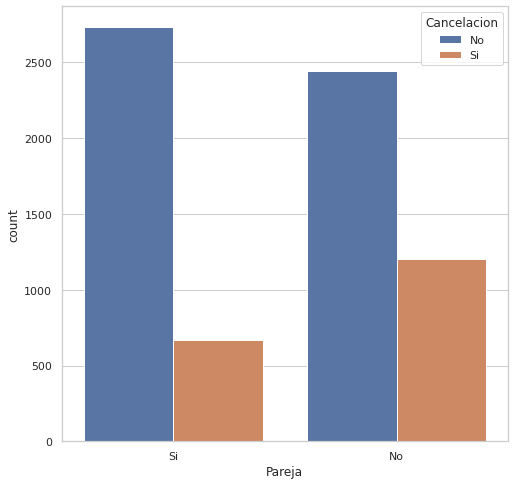

In [ ]:
plt.figure(figsize = (8,8))
sns.set(style = 'whitegrid')
sns.countplot(datos.Pareja, hue = datos.Cancelacion)

Hijos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


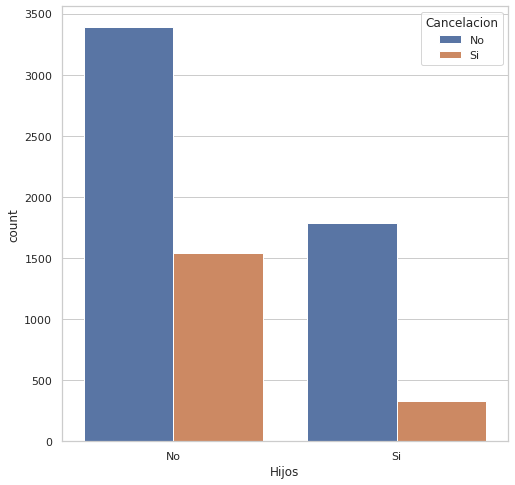

In [ ]:
plt.figure(figsize = (8,8))
sns.set(style = 'whitegrid')
sns.countplot(datos.Hijos, hue = datos.Cancelacion)

Servicios de internet del cliente

In [ ]:
datos.Internet.value_counts(normalize = True)

Fibra optica    0.439585
DSL             0.343746
No              0.216669
Name: Internet, dtype: float64

In [ ]:
pd.crosstab(datos.Internet, datos.Servicio, margins = True)

Servicio,No,Si,All
Internet,,,
DSL,682,1739,2421
Fibra optica,0,3096,3096
No,0,1526,1526
All,682,6361,7043


# **Preparación de los datos**

In [ ]:
datos.head()


,customerID,genero,Pareja,Hijos,Meses,Servicio,Lineas,Internet,Contrato,Factura,Pago,Impormensual,Importotal,Cancelacion
0,7590-VHVEG,Femenino,Si,No,1,No,Sin servicio telefónico,DSL,Mensual,Si,Cheque electrónico,29.85,29.85,No
1,5575-GNVDE,Masculino,No,No,34,Si,No,DSL,Anual,No,Cheque por correo,56.95,1889.50,No
2,3668-QPYBK,Masculino,No,No,2,Si,No,DSL,Mensual,Si,Cheque por correo,53.85,108.15,Si
3,7795-CFOCW,Masculino,No,No,45,No,Sin servicio telefónico,DSL,Anual,No,Débito en cuenta,42.30,1840.75,No
4,9237-HQITU,Femenino,No,No,2,Si,No,Fibra optica,Mensual,Si,Cheque electrónico,70.70,151.65,Si


In [ ]:
datos.columns

Index(['customerID', 'genero', 'Pareja', 'Hijos', 'Meses', 'Servicio',
       'Lineas', 'Internet', 'Contrato', 'Factura', 'Pago', 'Impormensual',
       'Importotal', 'Cancelacion'],
      dtype='object')

Reemplazamos los valores si y no por 1 y 0 respectivamente

In [ ]:
columns_to_convert = ['Pareja', 'Hijos','Servicio', 'Lineas','Factura',
                      'Cancelacion']
                      
                      
    
    
for item in columns_to_convert:
    datos[item].replace(to_replace=['Si', 'No'], value= [1,0], inplace = True)
datos.head()


,customerID,genero,Pareja,Hijos,Meses,Servicio,Lineas,Internet,Contrato,Factura,Pago,Impormensual,Importotal,Cancelacion
0,7590-VHVEG,Femenino,1,0,1,0,Sin servicio telefónico,DSL,Mensual,1,Cheque electrónico,29.85,29.85,0
1,5575-GNVDE,Masculino,0,0,34,1,0,DSL,Anual,0,Cheque por correo,56.95,1889.50,0
2,3668-QPYBK,Masculino,0,0,2,1,0,DSL,Mensual,1,Cheque por correo,53.85,108.15,1
3,7795-CFOCW,Masculino,0,0,45,0,Sin servicio telefónico,DSL,Anual,0,Débito en cuenta,42.30,1840.75,0
4,9237-HQITU,Femenino,0,0,2,1,0,Fibra optica,Mensual,1,Cheque electrónico,70.70,151.65,1


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customerID    7043 non-null   object 
 1   genero        7043 non-null   object 
 2   Pareja        7043 non-null   int64  
 3   Hijos         7043 non-null   int64  
 4   Meses         7043 non-null   int64  
 5   Servicio      7043 non-null   int64  
 6   Lineas        7043 non-null   object 
 7   Internet      7043 non-null   object 
 8   Contrato      7043 non-null   object 
 9   Factura       7043 non-null   int64  
 10  Pago          7043 non-null   object 
 11  Impormensual  7043 non-null   float64
 12  Importotal    7043 non-null   float64
 13  Cancelacion   7043 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 770.5+ KB


Reemplazamos Femenino y Masculino por 0 y 1 respectivamente.

In [ ]:
columns_to_convert = ['genero']
                      
                      
    
    
for item in columns_to_convert:
    datos[item].replace(to_replace=['Masculino', 'Femenino'], value= [1,0], inplace = True)
datos.head()

,customerID,genero,Pareja,Hijos,Meses,Servicio,Lineas,Internet,Contrato,Factura,Pago,Impormensual,Importotal,Cancelacion
0,7590-VHVEG,0,1,0,1,0,Sin servicio telefónico,DSL,Mensual,1,Cheque electrónico,29.85,29.85,0
1,5575-GNVDE,1,0,0,34,1,0,DSL,Anual,0,Cheque por correo,56.95,1889.50,0
2,3668-QPYBK,1,0,0,2,1,0,DSL,Mensual,1,Cheque por correo,53.85,108.15,1
3,7795-CFOCW,1,0,0,45,0,Sin servicio telefónico,DSL,Anual,0,Débito en cuenta,42.30,1840.75,0
4,9237-HQITU,0,0,0,2,1,0,Fibra optica,Mensual,1,Cheque electrónico,70.70,151.65,1


Reemplazamos sin servicio telefónico por 0

In [ ]:
datos.Lineas= datos.Lineas.replace(to_replace= 'Sin servicio telefónico', value = 'No')
datos.Lineas = datos.Lineas.replace(to_replace= ['Si', 'No'], value = [1,0])
datos.Lineas.value_counts()

0    4072
1    2971
Name: Lineas, dtype: int64

In [ ]:
datos.head()

,customerID,genero,Pareja,Hijos,Meses,Servicio,Lineas,Internet,Contrato,Factura,Pago,Impormensual,Importotal,Cancelacion
0,7590-VHVEG,0,1,0,1,0,0,DSL,Mensual,1,Cheque electrónico,29.85,29.85,0
1,5575-GNVDE,1,0,0,34,1,0,DSL,Anual,0,Cheque por correo,56.95,1889.50,0
2,3668-QPYBK,1,0,0,2,1,0,DSL,Mensual,1,Cheque por correo,53.85,108.15,1
3,7795-CFOCW,1,0,0,45,0,0,DSL,Anual,0,Débito en cuenta,42.30,1840.75,0
4,9237-HQITU,0,0,0,2,1,0,Fibra optica,Mensual,1,Cheque electrónico,70.70,151.65,1


Creamos variables dicotómicas (dummy) a partir de las variables cualitativas con más de dos categorías.

In [ ]:
dummy = pd.get_dummies(datos[['Internet', 'Contrato', 'Pago']], drop_first=True)
dummy.head()


,Internet_Fibra optica,Internet_No,Contrato_Bianual,Contrato_Mensual,Pago_Cheque por correo,Pago_Débito en cuenta,Pago_Tarjeta de crédito
0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,1,1,0,0
3,0,0,0,0,0,1,0
4,1,0,0,1,0,0,0


Para la variable Internet se toma como categoría de referencia DSL. En el caso de la variable Contrato la categoría de referencia es anual. Para Pago es cheque electrónico.

Agregamos las dummy en el data frame y eliminamos las variables originales

In [ ]:
datos = pd.concat([datos, dummy], axis=1)
datos.head()

,customerID,genero,Pareja,Hijos,Meses,Servicio,Lineas,Internet,Contrato,Factura,Pago,Impormensual,Importotal,Cancelacion,Internet_Fibra optica,Internet_No,Contrato_Bianual,Contrato_Mensual,Pago_Cheque por correo,Pago_Débito en cuenta,Pago_Tarjeta de crédito
0,7590-VHVEG,0,1,0,1,0,0,DSL,Mensual,1,Cheque electrónico,29.85,29.85,0,0,0,0,1,0,0,0
1,5575-GNVDE,1,0,0,34,1,0,DSL,Anual,0,Cheque por correo,56.95,1889.50,0,0,0,0,0,1,0,0
2,3668-QPYBK,1,0,0,2,1,0,DSL,Mensual,1,Cheque por correo,53.85,108.15,1,0,0,0,1,1,0,0
3,7795-CFOCW,1,0,0,45,0,0,DSL,Anual,0,Débito en cuenta,42.30,1840.75,0,0,0,0,0,0,1,0
4,9237-HQITU,0,0,0,2,1,0,Fibra optica,Mensual,1,Cheque electrónico,70.70,151.65,1,1,0,0,1,0,0,0


In [ ]:
datos = datos.drop(['Internet', 'Contrato', 'Pago'], axis = 1)
datos.head()


,customerID,genero,Pareja,Hijos,Meses,Servicio,Lineas,Factura,Impormensual,Importotal,Cancelacion,Internet_Fibra optica,Internet_No,Contrato_Bianual,Contrato_Mensual,Pago_Cheque por correo,Pago_Débito en cuenta,Pago_Tarjeta de crédito
0,7590-VHVEG,0,1,0,1,0,0,1,29.85,29.85,0,0,0,0,1,0,0,0
1,5575-GNVDE,1,0,0,34,1,0,0,56.95,1889.50,0,0,0,0,0,1,0,0
2,3668-QPYBK,1,0,0,2,1,0,1,53.85,108.15,1,0,0,0,1,1,0,0
3,7795-CFOCW,1,0,0,45,0,0,0,42.30,1840.75,0,0,0,0,0,0,1,0
4,9237-HQITU,0,0,0,2,1,0,1,70.70,151.65,1,1,0,0,1,0,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

In [ ]:
import statsmodels.api as sm

In [ ]:
# Indicamos las variables independientes y de respuesta
X = datos.drop(['Cancelacion', 'customerID', 'Importotal'], axis = 1)
y = datos['Cancelacion']


In [ ]:
X.head()


,genero,Pareja,Hijos,Meses,Servicio,Lineas,Factura,Impormensual,Internet_Fibra optica,Internet_No,Contrato_Bianual,Contrato_Mensual,Pago_Cheque por correo,Pago_Débito en cuenta,Pago_Tarjeta de crédito
0,0,1,0,1,0,0,1,29.85,0,0,0,1,0,0,0
1,1,0,0,34,1,0,0,56.95,0,0,0,0,1,0,0
2,1,0,0,2,1,0,1,53.85,0,0,0,1,1,0,0
3,1,0,0,45,0,0,0,42.30,0,0,0,0,0,1,0
4,0,0,0,2,1,0,1,70.70,1,0,0,1,0,0,0


In [ ]:
y.head()


0    0
1    0
2    1
3    0
4    1
Name: Cancelacion, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1]:
#veo p valor para rechazar la hipotesis nula, los voy sacando de a uno a los que tienen unp valor mayor que alfa

In [ ]:
#Ajuste con StatsModels
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.414940
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Cancelacion   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4914
Method:                           MLE   Df Model:                           15
Date:                Fri, 27 Aug 2021   Pseudo R-squ.:                  0.2815
Time:                        13:24:09   Log-Likelihood:                -2045.7
converged:                       True   LL-Null:                       -2847.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.6958      0.260     -2.681      0.007      -1.205   

El modelo logístico creado para predecir la probabilidad de que un cliente cancele el servicio  es en conjunto significativo (Likelihood ratio p-value = 0)

In [ ]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Cancelacion   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4914
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2045.7
Date:                Fri, 27 Aug 2021   Deviance:                       4091.3
Time:                        13:08:36   Pearson chi2:                 5.19e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.6958      0.260     -2.681      0.007      -1.205      -0.187
genero                     -0.0267      0.078     -0.344      0.731      -0.179       0.125
Pareja                      0.0772      0.092      0.836      0.403      -0.104       0.258
Hijos                      -0.3153      0.105     -3.010      0.003      -0.521      -0.110
Meses                      -0.0355      0.003    -12.896      0.000      -0.041      -0.030
Servicio                   -0.7048      0.171     -4.128      0.000      -1.039      -0.370
Lineas                      0.3708      0.097      3.822      0.000       0.181       0.561
Factura                     0.3898      0.089      4.395      0.000       0.216       0.564
Impormensual                0.0042      0.004      0.956      0.339      -0.004       0.013
Internet_Fibra optica       0.9823      0.157      6.244      0.000       0.674       1.291
Internet_No                -0.5667      0.220     -2.575      0.010      -0.998      -0.135
Contrato_Bianual           -0.7518      0.205     -3.664      0.000      -1.154      -0.350
Contrato_Mensual            0.7488      0.127      5.914      0.000       0.501       0.997
Pago_Cheque por correo     -0.4291      0.113     -3.780      0.000      -0.651      -0.207
Pago_Débito en cuenta      -0.3611      0.113     -3.205      0.001      -0.582      -0.140
Pago_Tarjeta de crédito    -0.4911      0.116     -4.226      0.000      -0.719      -0.263
===========================================================================================
"""

Eliminamos las variables no significativas.

In [ ]:
col = X_train.columns
col

Index(['const', 'genero', 'Pareja', 'Hijos', 'Meses', 'Servicio', 'Lineas',
       'Factura', 'Impormensual', 'Internet_Fibra optica', 'Internet_No',
       'Contrato_Bianual', 'Contrato_Mensual', 'Pago_Cheque por correo',
       'Pago_Débito en cuenta', 'Pago_Tarjeta de crédito'],
      dtype='object')

In [ ]:
col1 = col.drop('genero', 1)
col1

Index(['const', 'Pareja', 'Hijos', 'Meses', 'Servicio', 'Lineas', 'Factura',
       'Impormensual', 'Internet_Fibra optica', 'Internet_No',
       'Contrato_Bianual', 'Contrato_Mensual', 'Pago_Cheque por correo',
       'Pago_Débito en cuenta', 'Pago_Tarjeta de crédito'],
      dtype='object')

In [ ]:
X_train1 = sm.add_constant(X_train[col1])

In [ ]:
X_train = sm.add_constant(X_train1, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train1,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.414952
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Cancelacion   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4915
Method:                           MLE   Df Model:                           14
Date:                Fri, 27 Aug 2021   Pseudo R-squ.:                  0.2815
Time:                        13:24:23   Log-Likelihood:                -2045.7
converged:                       True   LL-Null:                       -2847.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.7098      0.256     -2.769      0.006      -1.212   

In [ ]:
col2= col1.drop('Pareja', 1)
col2

Index(['const', 'Hijos', 'Meses', 'Servicio', 'Lineas', 'Factura',
       'Impormensual', 'Internet_Fibra optica', 'Internet_No',
       'Contrato_Bianual', 'Contrato_Mensual', 'Pago_Cheque por correo',
       'Pago_Débito en cuenta', 'Pago_Tarjeta de crédito'],
      dtype='object')

In [ ]:
X_train2 = sm.add_constant(X_train1[col2])

In [ ]:
X_train = sm.add_constant(X_train2, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train2,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.415023
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Cancelacion   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4916
Method:                           MLE   Df Model:                           13
Date:                Fri, 27 Aug 2021   Pseudo R-squ.:                  0.2814
Time:                        13:24:29   Log-Likelihood:                -2046.1
converged:                       True   LL-Null:                       -2847.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.7030      0.256     -2.745      0.006      -1.205   

In [ ]:
col3= col2.drop('Impormensual', 1)
col3

Index(['const', 'Hijos', 'Meses', 'Servicio', 'Lineas', 'Factura',
       'Internet_Fibra optica', 'Internet_No', 'Contrato_Bianual',
       'Contrato_Mensual', 'Pago_Cheque por correo', 'Pago_Débito en cuenta',
       'Pago_Tarjeta de crédito'],
      dtype='object')

In [ ]:
X_train3 = sm.add_constant(X_train2[col3])

In [ ]:
X_train = sm.add_constant(X_train3, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train3,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.415122
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Cancelacion   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4917
Method:                           MLE   Df Model:                           12
Date:                Fri, 27 Aug 2021   Pseudo R-squ.:                  0.2812
Time:                        13:24:35   Log-Likelihood:                -2046.6
converged:                       True   LL-Null:                       -2847.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.5373      0.194     -2.770      0.006      -0.917   

El hecho detener hijos reduce las chances de abandonar el servicio en un 24% 
Por cada  mese que el cliente permanece en el servicio, las chances de abandonarlo se reducen en 3%
El hecho de tener servicio telefónico reduce las chances de cancelación en un 46%. 
Que el contrato sea Bianual en lugar de Anual(cat. de referencia) reduce las chances de abandono en 52%.
Elhecho de tener Internet por fibra óptica aumenta las chances de cancelacion casi 3 veces.